In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [31]:
data = pd.read_csv("TSA_DATA\Data01_02_FoodstuffCPI.csv", parse_dates=True)

<Axes: xlabel='Time'>

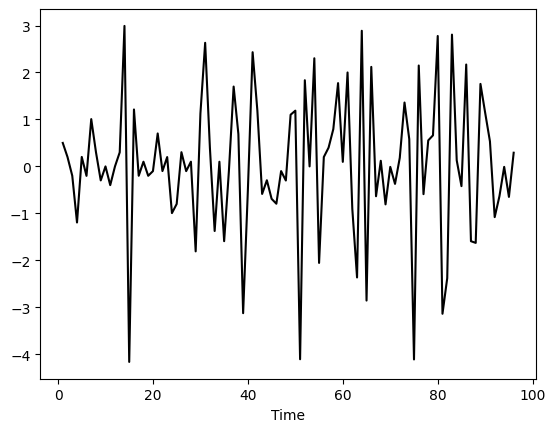

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
next = data['CPI_rate']
next.plot(ax=ax, style = "k-")

Trend Checking by regression analysis

In [15]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import preprocessing



In [33]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='CPI_rate~Time', data = data).fit()
print(lm.params)

Intercept   -0.006637
Time         0.000505
dtype: float64


In [34]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CPI_rate   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                  0.008265
Date:                Wed, 05 Nov 2025   Prob (F-statistic):              0.928
Time:                        19:02:04   Log-Likelihood:                -174.57
No. Observations:                  96   AIC:                             353.1
Df Residuals:                      94   BIC:                             358.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0066      0.310     -0.021      0.983      -0.622       0.609
Time           0.0005      0.006      0.091      0.928      -0.011       0.012
==============================================================================
Omnibus:                        6.668   Durbin-Watson:                   2.647
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.258
Skew:                          -0.501   Prob(JB):                       0.0438
Kurtosis:                       3.750   Cond. No.                         113.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Stationary Checking

In [35]:
CPI_rate = data['CPI_rate']
from statsmodels.tsa.stattools import adfuller
result = adfuller(CPI_rate)

# Extract and display results
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

# Interpretation
if result[1] <= 0.05:
    print("The time series is stationary (reject the null hypothesis).")
else:
    print("The time series is not stationary (fail to reject the null hypothesis).")


ADF Statistic: -7.664967104641786
p-value: 1.650454311307271e-11
Critical Values:
   1%: -3.50434289821397
   5%: -2.8938659630479413
   10%: -2.5840147047458037
The time series is stationary (reject the null hypothesis).


Calculating Autocorrelation

In [36]:
import statsmodels.api as sm

# Calculate autocorrelations
autocorrelations = sm.tsa.acf(CPI_rate)
print(autocorrelations)


[ 1.         -0.324323   -0.15267872 -0.06417798  0.0344032  -0.04712161
  0.11923193  0.15597169 -0.21286511 -0.13776607  0.15426009 -0.11403295
  0.26680871 -0.12095439  0.0095628  -0.16578834  0.04154865  0.02042864
  0.03496406  0.04948642]


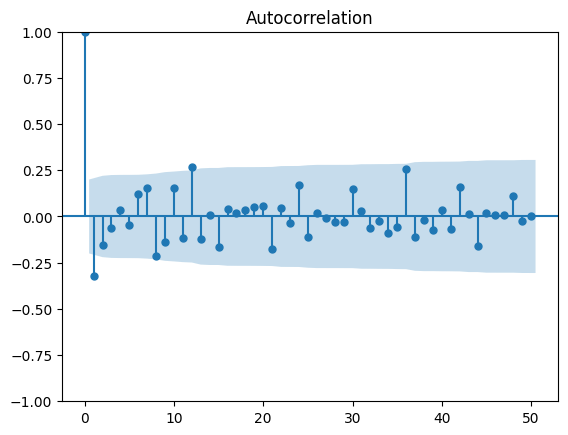

In [37]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt
# Plot autocorrelation function
fig = tsaplots.plot_acf(CPI_rate, lags=50)
plt.show()


Calculating Partial Autocorrelation


In [40]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt


In [42]:
# Computing and Plotting PACF
pacf_values = pacf(CPI_rate, nlags=12)
print("Partial Autocorrelation Function (PACF) values:")
for lag, pacf_val in enumerate(pacf_values):
    print(f"Lag {lag}: {pacf_val}")


Partial Autocorrelation Function (PACF) values:
Lag 0: 1.0
Lag 1: -0.32773692791130365
Lag 2: -0.29502810799093476
Lag 3: -0.2811644060990824
Lag 4: -0.20583253716335118
Lag 5: -0.264518344654458
Lag 6: -0.08741694064216811
Lag 7: 0.20109741151662988
Lag 8: -0.013022610324343308
Lag 9: -0.1872866307716879
Lag 10: -0.01606856390276603
Lag 11: -0.2833846105893373
Lag 12: 0.17708049950235097


<Figure size 1000x500 with 0 Axes>

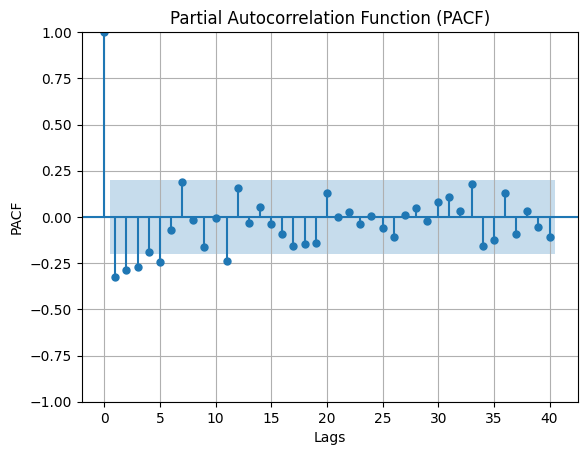

In [43]:
# Plot PACF
plt.figure(figsize=(10, 5))
plot_pacf(CPI_rate, lags=40)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.grid(True)
plt.show()
